In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
from PIL import Image
from pigs import Pigs
import matplotlib.pyplot as plt
im_size = (50,50)

image = Image.open('pigs.jpg').convert('LA')
image = image.resize(im_size)

pig = Pigs(stop=1e-3, verbose=True, beta=1000)
# pass image or image path or np.array
# pig.segment(image)
    

# if __name__ == '__main__':
#     main()

In [54]:
%%time
# 01.
flat_image = pig.flatter(image)
# 02.
gram = pig.compute_gram(flat_image)


Image shape: (50, 50, 2)
CPU times: user 3.6 s, sys: 14.9 ms, total: 3.62 s
Wall time: 3.62 s


In [29]:
# %%time
# flat_image = pig.flatter(image)
# # 02.
# gram = pig.compute_gram(flat_image)

# for i in range(gram.shape[0]//2):
#     for j in range(gram.shape[0]//2):
#         gram[i*2,j*2] = 0
#         gram[i*2+1,j*2+1] = 0


Image shape: (32, 32, 2)
9.749979673338959e-07
CPU times: user 1.25 s, sys: 0 ns, total: 1.25 s
Wall time: 1.25 s


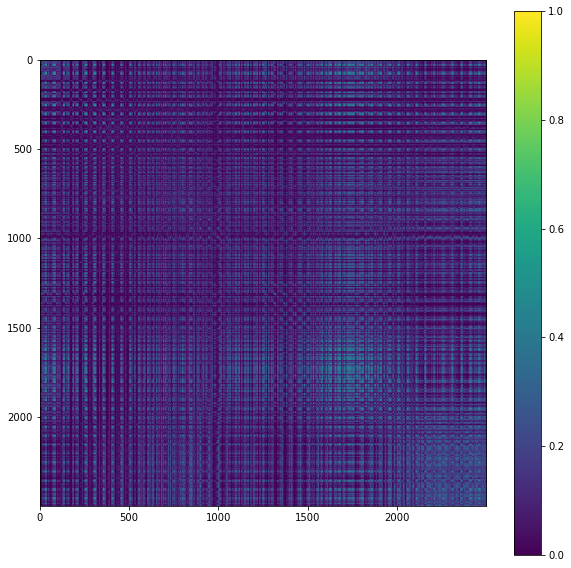

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(gram)
plt.colorbar()

In [56]:
degree, laplace = pig.compute_LD(gram)


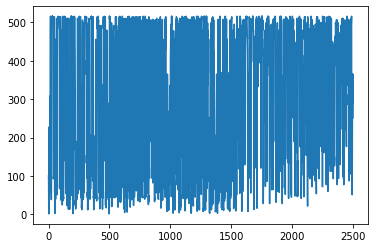

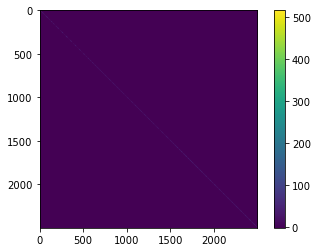

In [57]:
plt.figure()
plt.plot(degree)
plt.figure()
plt.imshow(laplace)
plt.colorbar()

In [58]:
# # 04.
x, root_node = pig.linear_solver(degree, laplace)
# # 05.

Root node: 1298


In [59]:
img_vector = flat_image

In [60]:
threshold, ir = pig.compute_IR_threshold(x, gram, degree)
print(threshold, ir )
mask = pig.generate_mask(img_vector, x, threshold, root_node)

1439.7752094302336 0.3929439819446841


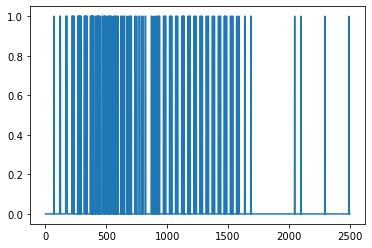

In [61]:
plt.plot(mask)

In [62]:
import numpy as np
mask.resize(im_size)
img = np.resize(flat_image, im_size)

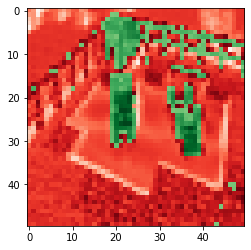

In [63]:
plt.imshow(img, 'Greens')
plt.imshow(np.ma.masked_where(mask, img), 'Reds')